In [114]:
import pandas
pandas.options.display.max_columns=999

import sbmlcore

### Adding features

Because this is a notebook for easy of use, one has to set the `filestem` flag to each of `'traintest'`,`'validation-samples'`, `'validation-mutations'`,or `'mic'` and run the notebook each time.

In [115]:
filestem = 'validation-mutations'

In [116]:
df2 = pandas.read_csv('data/ds-' + filestem+'-phen.csv')
df2.rename(columns={'MUTATION':'mutation', 'CONSISTENT_PHENOTYPE':'phenotype'}, inplace=True)
# df2.rename(columns={'MUTATION':'mutation', 'PHENOTYPE':'phenotype'}, inplace=True)
df2[:3]


,mutation,phenotype
0,A102R,S
1,A102T,R
2,A134V,R


In [117]:
dataset = sbmlcore.FeatureDataset(df2, species='M. tuberculosis', gene='pncA')
dataset.df['segid'] = 'A'
dataset.df[:3]

,mutation,phenotype,segid
0,A102R,S,A
1,A102T,R,A
2,A134V,R,A


### add change in amino acid sidechain volume

In [118]:
features = [sbmlcore.AminoAcidVolumeChange(), sbmlcore.AminoAcidHydropathyChangeKyteDoolittle(), sbmlcore.AminoAcidPiChange(), sbmlcore.AminoAcidMWChange(), sbmlcore.AminoAcidRogovChange()]
dataset.add_feature(features)
dataset.df[:3]

,mutation,phenotype,segid,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov
0,A146E,R,A,49.8,-5.3,-2.78,58.0,-0.033
1,A3E,R,A,49.8,-5.3,-2.78,58.0,-0.033
2,A46E,R,A,49.8,-5.3,-2.78,58.0,-0.033


### add features measured using STRIDE

In [119]:
dataset = dataset + sbmlcore.Stride('./data/reference/3PL1-PZA.pdb')
dataset.df['secondary_structure_codes'] = pandas.Categorical(dataset.df.secondary_structure, categories=dataset.df.secondary_structure.unique()).codes
dataset.df.drop(columns=['secondary_structure', 'secondary_structure_long', 'B', 'C', 'E', 'G', 'H', 'T'], inplace=True)
dataset.df[:3]

,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes
0,A,A3E,R,49.8,-5.3,-2.78,58.0,-0.033,-126.53,153.85,0.0,1.0,1.0,0
1,A,A30V,S,51.4,2.4,-0.04,28.0,0.232,-63.22,-36.78,38.4,1.0,1.0,1
2,A,A46E,R,49.8,-5.3,-2.78,58.0,-0.033,-131.54,158.71,0.0,1.0,1.0,0


In [120]:
dataset = dataset + sbmlcore.TempFactors('data/reference/3PL1-PZA.pdb')
dataset.df[:5]

/Users/fowler/Library/Python/3.10/lib/python/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor
0,A,M1I,S,3.8,2.6,0.28,-18.0,-0.452,0.00,-35.20,86.2,2.0,0.0,3,59.720001
1,A,M1T,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.00,-35.20,86.2,2.0,0.0,3,59.720001
2,A,A3E,R,49.8,-5.3,-2.78,58.0,-0.033,-126.53,153.85,0.0,1.0,1.0,0,43.310001
3,A,L4S,R,-77.7,-4.6,-0.30,-26.1,0.015,-103.24,132.40,0.2,1.0,1.0,0,37.549999
4,A,I5S,R,-77.7,-5.3,-0.34,-26.1,-0.026,-113.70,111.88,0.2,1.0,1.0,0,33.880001


<AxesSubplot:>

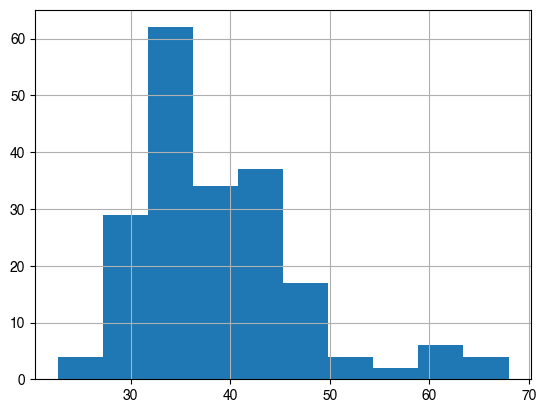

In [121]:
dataset.df.temp_factor.hist()

### add residue depth as measured by BioPython

In [122]:
dataset = dataset + sbmlcore.ResidueDepth('data/reference/3PL1-PZA.pdb', segids=['A'])
dataset.df[:3]

/Users/fowler/Library/Python/3.10/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C6) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'H' for Atom (name=H6) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N5) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C4) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'H' for Atom (name=H4) with given element ''
  warnings

,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth
0,A,M1I,S,3.8,2.6,0.28,-18.0,-0.452,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049
1,A,M1T,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049
2,A,A3E,R,49.8,-5.3,-2.78,58.0,-0.033,-126.53,153.85,0.0,1.0,1.0,0,43.310001,5.503930


### add effect on protein stability as estimated by DeepDDG

In [123]:
dataset = dataset + sbmlcore.DeepDDG('./data/features/3pl1.ddg')
dataset.df.deep_ddG.fillna(value=0, inplace=True)
dataset.df[:3]

,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG
0,A,M1I,S,3.8,2.6,0.28,-18.0,-0.452,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-0.407
1,A,M1T,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-1.096
2,A,A3E,R,49.8,-5.3,-2.78,58.0,-0.033,-126.53,153.85,0.0,1.0,1.0,0,43.310001,5.503930,-5.340


Most mutations are predicted to be destabilising as expected

<AxesSubplot:>

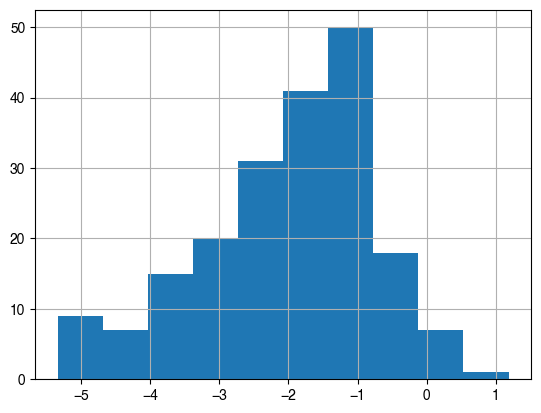

In [124]:
dataset.df.deep_ddG.hist()

### add effect on protein stability estimated by RaSP

<AxesSubplot:>

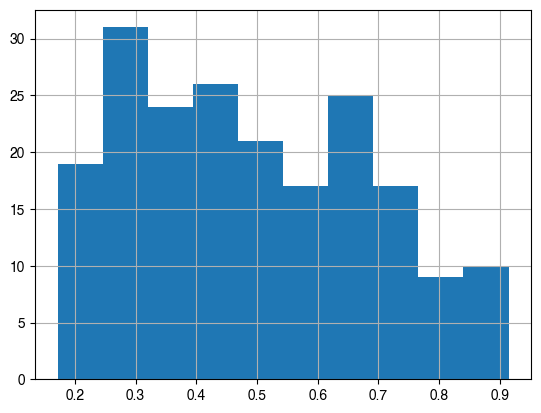

In [125]:
# a = sbmlcore.RaSP('data/features/cavity_pred_3PL1_A.csv')
# a.results.rasp_score_ml.hist()
dataset = dataset + sbmlcore.RaSP('data/features/cavity_pred_3PL1_A.csv')
dataset.df.drop(columns=['rasp_score_ml'], inplace=True)
dataset.df.rasp_score_ml_fermi.hist()

In [126]:
dataset = dataset + sbmlcore.SNAP2('./data/features/3pl1-snap2-with-segids.csv', offsets={'A': 0})
dataset.df.drop(columns=['snap2_accuracy'], inplace=True)
dataset.df[:3]

,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_wt_nlf,rasp_mt_nlf,rasp_score_ml_fermi,snap2_score
0,A,M1I,S,3.8,2.6,0.28,-18.0,-0.452,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-0.407,3.785957,2.854018,0.236948,7
1,A,M1T,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-1.096,3.785957,2.896883,0.281366,52
2,A,A3E,R,49.8,-5.3,-2.78,58.0,-0.033,-126.53,153.85,0.0,1.0,1.0,0,43.310001,5.503930,-5.340,2.483982,2.712832,0.554393,56


### add distance from the catalytic Iron 

In [127]:
dataset = dataset + sbmlcore.StructuralDistances('data/reference/3PL1-PZA.pdb', 'resname FE2', 'dist_FE2')
dataset.df[:3]

/Users/fowler/Library/Python/3.10/lib/python/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_wt_nlf,rasp_mt_nlf,rasp_score_ml_fermi,snap2_score,dist_FE2
0,A,M1I,S,3.8,2.6,0.28,-18.0,-0.452,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-0.407,3.785957,2.854018,0.236948,7,29.948318
1,A,M1T,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-1.096,3.785957,2.896883,0.281366,52,29.948318
2,A,A3E,R,49.8,-5.3,-2.78,58.0,-0.033,-126.53,153.85,0.0,1.0,1.0,0,43.310001,5.503930,-5.340,2.483982,2.712832,0.554393,56,24.149025


### add distance from the bound pyrazinamide

In [128]:
dataset = dataset + sbmlcore.StructuralDistances('data/reference/3PL1-PZA.pdb', 'resname PZA', 'dist_PZA', infer_masses=False)


/Users/fowler/Library/Python/3.10/lib/python/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [129]:
dataset.df

,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_wt_nlf,rasp_mt_nlf,rasp_score_ml_fermi,snap2_score,dist_FE2,dist_PZA
0,A,M1I,S,3.8,2.6,0.28,-18.0,-0.452,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-0.407,3.785957,2.854018,0.236948,7,29.948318,27.641663
1,A,M1T,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-1.096,3.785957,2.896883,0.281366,52,29.948318,27.641663
2,A,A3E,R,49.8,-5.3,-2.78,58.0,-0.033,-126.53,153.85,0.0,1.0,1.0,0,43.310001,5.503930,-5.340,2.483982,2.712832,0.554393,56,24.149025,21.557456
3,A,L4S,R,-77.7,-4.6,-0.30,-26.1,0.015,-103.24,132.40,0.2,1.0,1.0,0,37.549999,5.075218,-2.638,2.433114,2.844502,0.643279,63,21.796820,18.780048
4,A,I5S,R,-77.7,-5.3,-0.34,-26.1,-0.026,-113.70,111.88,0.2,1.0,1.0,0,33.880001,8.653551,-3.518,2.854018,2.844502,0.685773,63,17.942997,15.158482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,A,M175V,R,-22.9,2.3,0.22,-32.1,-0.514,-67.30,-49.00,0.0,3.0,2.0,1,45.490002,4.312460,-2.087,3.785957,2.623741,0.371834,52,21.387932,17.375624
195,A,V180A,R,-51.4,-2.4,0.04,-28.0,0.232,-73.47,140.70,5.4,0.0,1.0,3,43.340000,2.863976,-2.408,2.623741,2.483982,0.503521,-8,23.910008,20.039579
196,A,V180F,R,49.9,-1.4,-0.48,48.1,0.345,-73.47,140.70,5.4,0.0,1.0,3,43.340000,2.863976,-3.033,2.623741,3.207937,0.587672,57,23.910008,20.039579
197,A,V180G,R,-79.9,-4.6,0.01,-42.0,-0.080,-73.47,140.70,5.4,0.0,1.0,3,43.340000,2.863976,-3.447,2.623741,2.560213,0.724051,61,23.910008,20.039579


### add mCSM predicted stability scores

In [130]:
 # add mCSM stability
df = pandas.read_csv('data/features/3pl1-mcsm_stability.txt', sep='\t')

def create_mutation(row):
    return row['WILD_RES']+str(row.RES_POS)+row['MUT_RES']

df['mutation'] = df.apply(create_mutation, axis=1)
df = df[['mutation','RSA','PRED_DDG']]
df.rename(columns={'RSA': 'mcsm_stability_rsa', 'PRED_DDG': 'mcsm_stability_ddG'}, inplace=True)
df.set_index('mutation', inplace=True)
df
dataset.df.set_index('mutation', inplace=True)
dataset.df = dataset.df.join(df,how='left')
dataset.df.reset_index(inplace=True)
dataset.df

,mutation,segid,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_wt_nlf,rasp_mt_nlf,rasp_score_ml_fermi,snap2_score,dist_FE2,dist_PZA,mcsm_stability_rsa,mcsm_stability_ddG
0,M1I,A,S,3.8,2.6,0.28,-18.0,-0.452,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-0.407,3.785957,2.854018,0.236948,7,29.948318,27.641663,54.8,-0.771
1,M1T,A,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-1.096,3.785957,2.896883,0.281366,52,29.948318,27.641663,54.8,-0.367
2,A3E,A,R,49.8,-5.3,-2.78,58.0,-0.033,-126.53,153.85,0.0,1.0,1.0,0,43.310001,5.503930,-5.340,2.483982,2.712832,0.554393,56,24.149025,21.557456,0.0,-2.528
3,L4S,A,R,-77.7,-4.6,-0.30,-26.1,0.015,-103.24,132.40,0.2,1.0,1.0,0,37.549999,5.075218,-2.638,2.433114,2.844502,0.643279,63,21.796820,18.780048,0.1,-3.567
4,I5S,A,R,-77.7,-5.3,-0.34,-26.1,-0.026,-113.70,111.88,0.2,1.0,1.0,0,33.880001,8.653551,-3.518,2.854018,2.844502,0.685773,63,17.942997,15.158482,0.1,-3.521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,M175V,A,R,-22.9,2.3,0.22,-32.1,-0.514,-67.30,-49.00,0.0,3.0,2.0,1,45.490002,4.312460,-2.087,3.785957,2.623741,0.371834,52,21.387932,17.375624,0.0,-1.447
195,V180A,A,R,-51.4,-2.4,0.04,-28.0,0.232,-73.47,140.70,5.4,0.0,1.0,3,43.340000,2.863976,-2.408,2.623741,2.483982,0.503521,-8,23.910008,20.039579,0.0,-1.987
196,V180F,A,R,49.9,-1.4,-0.48,48.1,0.345,-73.47,140.70,5.4,0.0,1.0,3,43.340000,2.863976,-3.033,2.623741,3.207937,0.587672,57,23.910008,20.039579,0.0,-1.494
197,V180G,A,R,-79.9,-4.6,0.01,-42.0,-0.080,-73.47,140.70,5.4,0.0,1.0,3,43.340000,2.863976,-3.447,2.623741,2.560213,0.724051,61,23.910008,20.039579,0.0,-2.366


In [131]:
df = pandas.read_csv('data/features/3pl1-mapp_scores.csv')
df2 = pandas.melt(df, id_vars='Position',value_vars=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'])
df2.rename(columns={'Position': 'codon', 'variable': 'alt_amino_acid', 'value': 'mapp_score'}, inplace=True)
df2.set_index(['codon', 'alt_amino_acid'], inplace=True)

def split_mutation(row):
    return pandas.Series([int(row.mutation[1:-1]), row.mutation[-1]])

df2

dataset.df[['codon', 'alt_amino_acid']] = dataset.df.apply(split_mutation, axis=1)
dataset.df.set_index(['codon', 'alt_amino_acid'], inplace=True)
dataset.df = dataset.df.join(df2,how='left')
dataset.df.reset_index(inplace=True)
dataset.df.drop(columns=['codon', 'alt_amino_acid'], inplace=True)
dataset.df


,mutation,segid,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_wt_nlf,rasp_mt_nlf,rasp_score_ml_fermi,snap2_score,dist_FE2,dist_PZA,mcsm_stability_rsa,mcsm_stability_ddG,mapp_score
0,M1I,A,S,3.8,2.6,0.28,-18.0,-0.452,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-0.407,3.785957,2.854018,0.236948,7,29.948318,27.641663,54.8,-0.771,21.99
1,M1T,A,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-1.096,3.785957,2.896883,0.281366,52,29.948318,27.641663,54.8,-0.367,25.97
2,A3E,A,R,49.8,-5.3,-2.78,58.0,-0.033,-126.53,153.85,0.0,1.0,1.0,0,43.310001,5.503930,-5.340,2.483982,2.712832,0.554393,56,24.149025,21.557456,0.0,-2.528,35.68
3,L4S,A,R,-77.7,-4.6,-0.30,-26.1,0.015,-103.24,132.40,0.2,1.0,1.0,0,37.549999,5.075218,-2.638,2.433114,2.844502,0.643279,63,21.796820,18.780048,0.1,-3.567,3.41
4,I5S,A,R,-77.7,-5.3,-0.34,-26.1,-0.026,-113.70,111.88,0.2,1.0,1.0,0,33.880001,8.653551,-3.518,2.854018,2.844502,0.685773,63,17.942997,15.158482,0.1,-3.521,14.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,M175V,A,R,-22.9,2.3,0.22,-32.1,-0.514,-67.30,-49.00,0.0,3.0,2.0,1,45.490002,4.312460,-2.087,3.785957,2.623741,0.371834,52,21.387932,17.375624,0.0,-1.447,30.01
195,V180A,A,R,-51.4,-2.4,0.04,-28.0,0.232,-73.47,140.70,5.4,0.0,1.0,3,43.340000,2.863976,-2.408,2.623741,2.483982,0.503521,-8,23.910008,20.039579,0.0,-1.987,3.24
196,V180F,A,R,49.9,-1.4,-0.48,48.1,0.345,-73.47,140.70,5.4,0.0,1.0,3,43.340000,2.863976,-3.033,2.623741,3.207937,0.587672,57,23.910008,20.039579,0.0,-1.494,2.97
197,V180G,A,R,-79.9,-4.6,0.01,-42.0,-0.080,-73.47,140.70,5.4,0.0,1.0,3,43.340000,2.863976,-3.447,2.623741,2.560213,0.724051,61,23.910008,20.039579,0.0,-2.366,5.43


In [132]:
dataset.df.phenotype.value_counts()

R    155
S     44
Name: phenotype, dtype: int64

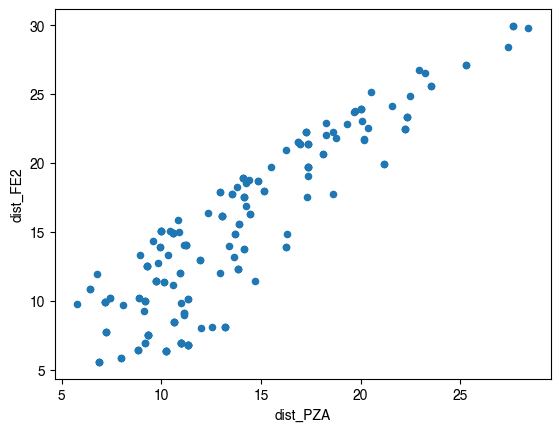

In [133]:
axes = dataset.df.plot.scatter(x='dist_PZA', y='dist_FE2')

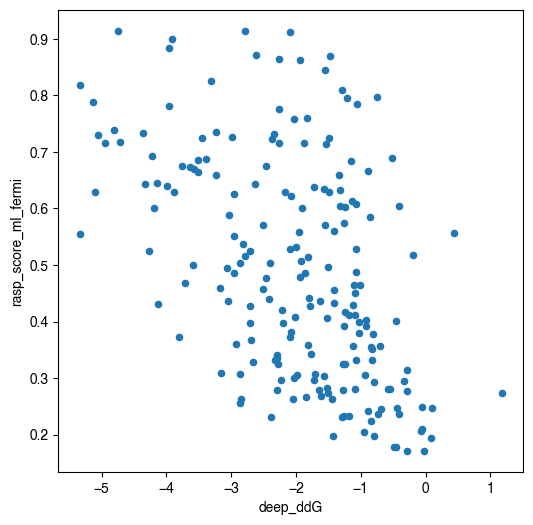

In [134]:
axes = dataset.df.plot.scatter(x='deep_ddG', y='rasp_score_ml_fermi', figsize=(6,6))

In [135]:
dataset.df.to_csv('data/ds-'+filestem+'-phen-features.csv', index=False)

In [136]:
dataset.df.set_index('mutation', inplace=True)

In [137]:
dataset.df

,segid,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_wt_nlf,rasp_mt_nlf,rasp_score_ml_fermi,snap2_score,dist_FE2,dist_PZA,mcsm_stability_rsa,mcsm_stability_ddG,mapp_score
mutation,,,,,,,,,,,,,,,,,,,,,,,,,
M1I,A,S,3.8,2.6,0.28,-18.0,-0.452,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-0.407,3.785957,2.854018,0.236948,7,29.948318,27.641663,54.8,-0.771,21.99
M1T,A,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-1.096,3.785957,2.896883,0.281366,52,29.948318,27.641663,54.8,-0.367,25.97
A3E,A,R,49.8,-5.3,-2.78,58.0,-0.033,-126.53,153.85,0.0,1.0,1.0,0,43.310001,5.503930,-5.340,2.483982,2.712832,0.554393,56,24.149025,21.557456,0.0,-2.528,35.68
L4S,A,R,-77.7,-4.6,-0.30,-26.1,0.015,-103.24,132.40,0.2,1.0,1.0,0,37.549999,5.075218,-2.638,2.433114,2.844502,0.643279,63,21.796820,18.780048,0.1,-3.567,3.41
I5S,A,R,-77.7,-5.3,-0.34,-26.1,-0.026,-113.70,111.88,0.2,1.0,1.0,0,33.880001,8.653551,-3.518,2.854018,2.844502,0.685773,63,17.942997,15.158482,0.1,-3.521,14.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M175V,A,R,-22.9,2.3,0.22,-32.1,-0.514,-67.30,-49.00,0.0,3.0,2.0,1,45.490002,4.312460,-2.087,3.785957,2.623741,0.371834,52,21.387932,17.375624,0.0,-1.447,30.01
V180A,A,R,-51.4,-2.4,0.04,-28.0,0.232,-73.47,140.70,5.4,0.0,1.0,3,43.340000,2.863976,-2.408,2.623741,2.483982,0.503521,-8,23.910008,20.039579,0.0,-1.987,3.24
V180F,A,R,49.9,-1.4,-0.48,48.1,0.345,-73.47,140.70,5.4,0.0,1.0,3,43.340000,2.863976,-3.033,2.623741,3.207937,0.587672,57,23.910008,20.039579,0.0,-1.494,2.97
